In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()

X = iris.data
Y = iris.target

train_x, test_x, train_y, test_y = train_test_split(X, Y)

mean = train_x.mean(axis = 0)
std = train_x.std(axis = 0)

train_scaled = (train_x - mean) / std
test_scaled = (test_x - mean) / std

In [5]:
model = keras.Sequential() # 인공신경망 설계하기위한 도화지
model.add(keras.layers.Dense(8, activation = 'sigmoid', input_shape = (4,)))
model.add(keras.layers.Dense(3, activation = 'softmax'))

model.compile(loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'],
              optimizer = 'adam')

hist = model.fit(train_scaled, train_y,
                 epochs = 1000,
                 validation_data = (test_scaled, test_y))

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.3313 - loss: 1.1845 - val_accuracy: 0.3947 - val_loss: 1.1406
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3073 - loss: 1.1945 - val_accuracy: 0.3947 - val_loss: 1.1318
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3219 - loss: 1.1760 - val_accuracy: 0.3947 - val_loss: 1.1235
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3094 - loss: 1.1713 - val_accuracy: 0.3947 - val_loss: 1.1158
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3052 - loss: 1.1694 - val_accuracy: 0.3947 - val_loss: 1.1085
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3240 - loss: 1.1351 - val_accuracy: 0.3947 - val_loss: 1.1016
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2814 - loss: 1.1428 - val_accuracy: 0.3947 - val_loss: 1.0951
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3266 - loss: 1.1228 - val_accuracy: 0.3947 - val_loss: 1.08

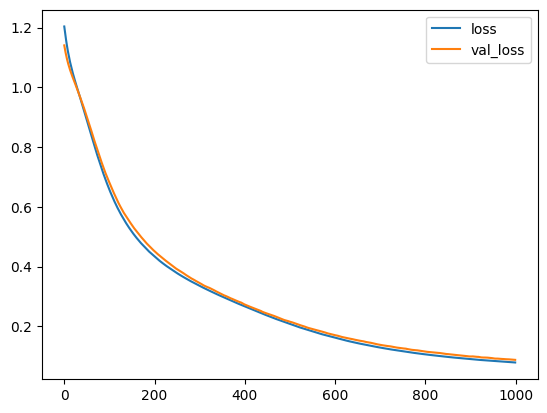

In [6]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [8]:
import pandas as pd

pima = pd.read_csv("/content/pima_indians.csv")
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
